In [1]:
from agentEnv import environment
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

# Test Functions

In [2]:
"""
Creates an environment with a given set of parameters, runs it, and returns the corresponding results
"""
def test(params, steps, gens, seed = 0):
    # create the environment
    env = environment(predfreq = params[0], accalarm = params[1], falarm = params[2],
                      preddet = params[3], alarmdet = params[4], condet = params[5], predr = params[6],
                      conr = params[7], popsize = params[8], vigprop = params[9], invprop = params[10],
                      mutrate = params[11], fthresh = params[12], predforage = params[13], predflee = params[14],
                      lrate = .05, topology = [1, 2], actfunc = 's', seed = seed)
    # run and return the results
    return env.run(steps, gens)

In [3]:
"""
Replicates a given test n times and returns the average
"""

def replicate(params, n, steps, gens):
    
    # empty array to store results as a running sum
    if gens == 1:
        results = np.zeros((steps, 4))
    else:
        results = np.zeros((gens, 4))
    
    # test for the given set of parameters for seeds 0 to n
    for i in range(n):
        results += test(params, steps, gens, seed = i)
    
    # return the mean by dividing everything by the number of trials
    return results/n

In [4]:
"""
Loop through a list of values for a given parameter and return an array of the final results
paramdex - index of where the parameter appears as an argument to environment
vals - list of values of that parameter to check
replicates - number of runs to average over
baseparams - list of baseline parameter values (assumed optimal unless given others)
steps - number of steps in each generation
gens - number of generations
"""
def testParam(paramdex, vals, baseparams, steps, gens, replicates = 1):
    # initialize a numpy array to hold the results
    results = np.zeros((vals.shape[0], 4))
    
    # copy baseparams to get a new list into which the new parameter values can be inserted
    params = copy.copy(baseparams)
    
    # loop through a range of provided parameter values
    for v in range(vals.shape[0]):
        # grab the actual value
        val = vals[v]
        # change the parameter value
        params[paramdex] = val
        # run the environment and get the results
        res = replicate(params, replicates, steps, gens)
        # add the results into the array
        results[v,:] = res[-1, :]
        # except replace fleeing with an average if it's by step
        if gens == 1:
            results[v, 3] = np.mean(res[:, 3])
    # once it's all done, return the results array
    return results

In [5]:
"""
Plot error over values of a single parameter
"""
def plotOne(xvals, yvals, name = None, pname = None):
    plt.plot(xvals, yvals, 'o-')
    plt.legend(["Vigilance", "Individual Learning", "Social Learning", "Fleeing"], loc = 0)
    if pname:
        plt.xlabel(pname)
    else:
        plt.xlabel("Parameter Value")
    plt.ylabel("Surviving Individuals")
    if name:
        plt.title(name)
    plt.show()

In [11]:
"""
Runs the simulation on a single set of parameters a given number of times and plots the resulting genotype frequencies by timestep or generation
"""
def timecourseTest(params, replicates, steps, gens, name = "Genome Distribution over Time", pname = "Generation", fleeing = False, prop = False):
    # Runs the simulation on params and grabs the results
    results = replicate(params, replicates, steps, gens)
    
    #Plots the results
    if gens == 1:
        xvals = np.arange(steps)
    else:
        xvals = np.arange(gens)
    if fleeing:
        yvals = results
    else:
        yvals = results[:, :3]
    plotOne(xvals, yvals, name = name, pname = pname)
    
    # if indicated, turn the results into proportions and plot those as well
    if prop:
        total = np.sum(results[:, :3], axis = 1)
        yvals = np.apply_along_axis(lambda r: r/total, 0, yvals)
        plotOne(xvals, yvals, name = name+" Proportions", pname = pname)



"""
Runs the simulation for a range of parameter values (default 0 to 1) and plots the results
"""
def paramTest(paramdex, baseparams, steps, gens, replicates, name = None, pname = None, vals = np.arange(0, 1.1, .1), fleeing = False, prop = False):
    # run the simulation
    res = testParam(paramdex, vals, baseparams, steps, gens, replicates)
    
    # if indicated, turn the results into proportions
    if prop:
        total = np.sum(res[:, :3], axis = 1)
        res = np.apply_along_axis(lambda r: r/total, 0, res)
    
    # remove fleeing if not indicated
    if not fleeing:
        res = res[:, :3]
    
    # plot the results
    plotOne(vals, res, name, pname)


# initialize baseparams for repeated use
# predfreq = .1, accalarm = 1, falarm = 0, preddet = 1, alarmdet = 1, condet = 1, predr = 1, conr = 1,
# popsize = 100, vigprop = .34, invprop = .33, mutrate = .01, fthresh = 10, predforage = .01, predflee = 0
baseparams = [.1, 1, 0, 1, 1, 1, 1, 1, 100, .4, .3, .5, 10, .01, 0]

## Timecourse Tests

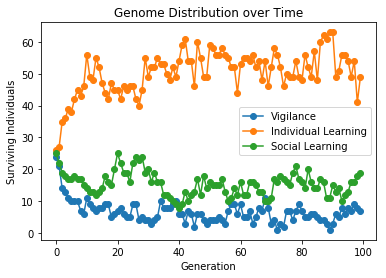

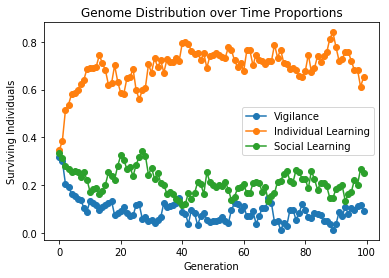

In [7]:
# test evolution over 100 generations with base parameters
timecourseTest(baseparams, 1, 1000, 100, pname = "Generation", prop = True)

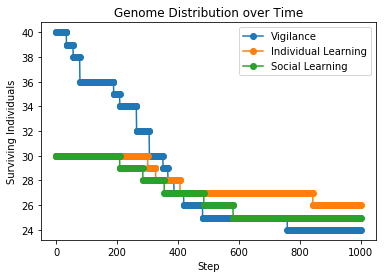

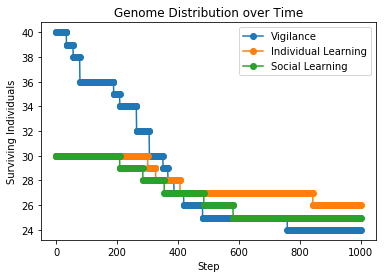

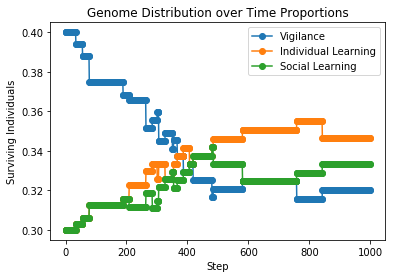

In [8]:
# test survival over a single generation
timecourseTest(baseparams, 1, 1000, 1, pname = "Step", prop = True)

## Predator Frequency

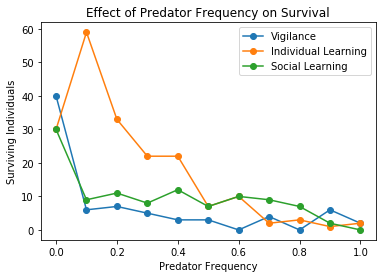

In [13]:
paramTest(0, baseparams, 1000, 20, 1, name = "Effect of Predator Frequency on Survival", pname = "Predator Frequency")

## Accurate Alarm Frequency

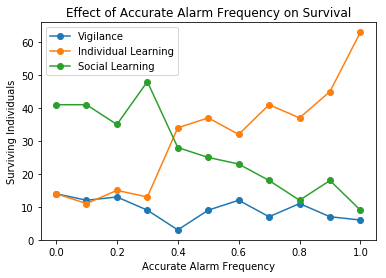

In [14]:
paramTest(1, baseparams, 1000, 20, 1, name = "Effect of Accurate Alarm Frequency on Survival", pname = "Accurate Alarm Frequency")

## False Alarm Frequency

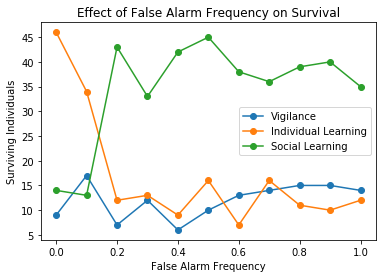

In [15]:
paramTest(2, baseparams, 1000, 20, 1, name = "Effect of False Alarm Frequency on Survival", pname = "False Alarm Frequency")

## Predator Detection Rate

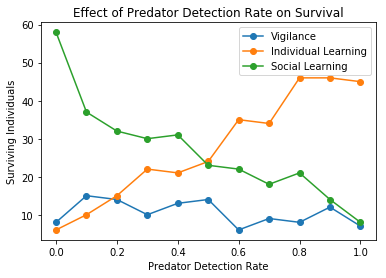

In [16]:
paramTest(3, baseparams, 1000, 20, 1, name = "Effect of Predator Detection Rate on Survival", pname = "Predator Detection Rate")

## Alarm Detection Rate

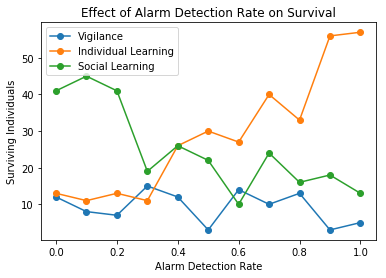

In [17]:
paramTest(4, baseparams, 1000, 20, 1, name = "Effect of Alarm Detection Rate on Survival", pname = "Alarm Detection Rate")

## Conspecific Detection Rate

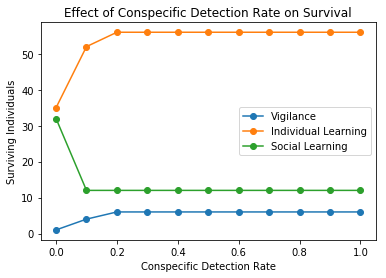

In [18]:
paramTest(5, baseparams, 1000, 20, 1, name = "Effect of Conspecific Detection Rate on Survival", pname = "Conspecific Detection Rate")

## Foraging Threshold

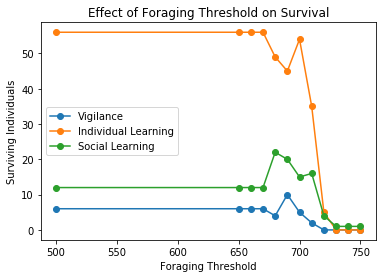

In [19]:
paramTest(12, baseparams, 1000, 20, 1, name = "Effect of Foraging Threshold on Survival", pname = "Foraging Threshold", vals = np.array([500, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750]))

## Probability of Predation while Foraging

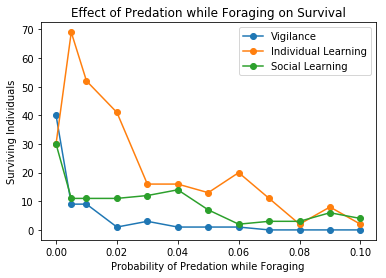

In [20]:
paramTest(13, baseparams, 1000, 20, 1, name = "Effect of Predation while Foraging on Survival", pname = "Probability of Predation while Foraging", vals = np.array([0, .005, .01, .02, .03, .04, .05, .06, .07, .08, .09, .1]))

## Probability of Predation while Fleeing

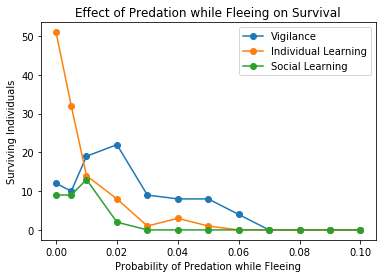

In [21]:
paramTest(14, baseparams, 1000, 20, 1, name = "Effect of Predation while Fleeing on Survival", pname = "Probability of Predation while Fleeing", vals = np.array([0, .005, .01, .02, .03, .04, .05, .06, .07, .08, .09, .1]))